# Reading datset into data Frame

In [ ]:
#importing pandas for converting dataset into dataframe
import pandas as pd
#importing numpy for linear algebra
import numpy as np

#importing matplot libraries for constructing graphs
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


#importing seaborn for visualization of charts
import seaborn as sns 

#importing preprocessing for vectorization of instances
from sklearn import preprocessing

#importing different ML Classifiers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

#importing ML evaluation metrics
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection

#importing scikitplot to plot confusion matrix
#import scikitplot as skplt

In [236]:
gender_prediction_df = pd.read_csv("gender-prediction.csv")

In [237]:
gender_prediction_df.head(14)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
5,71,190,yes,short,43,no,black,male
6,74,201,yes,bald,44,no,brown,male
7,74,182,no,short,46,no,brown,male
8,63,127,no,short,35,no,green,female
9,65,139,no,medium,37,yes,gray,female


# Conversion of object Type into numeric

In [294]:
label = preprocessing.LabelEncoder()
gender_prediction_df['hair_length'] = label.fit_transform(gender_prediction_df['hair_length'])
gender_prediction_df['beard'] = label.fit_transform(gender_prediction_df['beard'])
gender_prediction_df['eye_color'] = label.fit_transform(gender_prediction_df['eye_color'])
gender_prediction_df['scarf'] = label.fit_transform(gender_prediction_df['scarf'])
gender_prediction_df['gender'] = label.fit_transform(gender_prediction_df['gender'])

In [92]:
gender_prediction_df.head(14)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,1,3,44,0,0,1
1,68,165,0,0,41,0,0,1
2,62,132,0,2,37,1,1,0
3,65,138,0,1,38,0,3,0
4,70,197,1,2,43,0,3,1
5,71,190,1,3,43,0,0,1
6,74,201,1,0,44,0,2,1
7,74,182,0,3,46,0,2,1
8,63,127,0,3,35,0,4,0
9,65,139,0,2,37,1,3,0


# Class ratio (male vs female) 

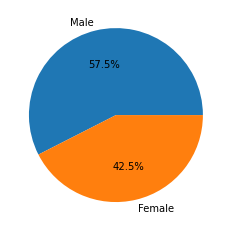

In [93]:
gender = ['Male','Female']
m=gender_prediction_df['gender']== 1
f=gender_prediction_df['gender']== 0
male = len(gender_prediction_df[m])
female = len(gender_prediction_df[f])
count = [male, female]
plt.pie(count, labels = gender, autopct='%1.1f%%')
plt.show()

In [94]:
length = len(genders_df)
print('Ratio of males: ', male,'/',length)
print('Ratio of females: ', female,'/',length)

Ratio of males:  46 / 80
Ratio of females:  34 / 80


<AxesSubplot:xlabel='gender', ylabel='count'>

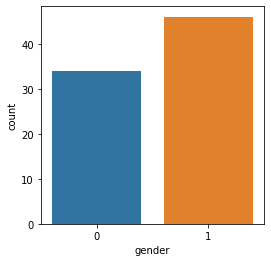

In [26]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(x='gender', data= genders_df)

#  Standard train/test split

In [95]:
#seperating dependent and independent variables
dx = gender_prediction_df.drop(['gender'], axis = 1)
dy = gender_prediction_df['gender']

In [96]:
dy

0     1
1     1
2     0
3     0
4     1
     ..
75    0
76    0
77    1
78    1
79    0
Name: gender, Length: 80, dtype: int64

In [98]:
dx

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
0,71,176,1,3,44,0,0
1,68,165,0,0,41,0,0
2,62,132,0,2,37,1,1
3,65,138,0,1,38,0,3
4,70,197,1,2,43,0,3
...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4
76,61,98,0,3,37,0,2
77,67,119,1,3,40,0,0
78,70,190,1,2,43,0,3


In [257]:
#Applying train-test split
X_train, X_test, Y_train, Y_test = train_test_split(dx, dy, stratify=dy, test_size=0.33, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(dx, dy, stratify=dy, test_size=0.2, random_state = 42)

# Appyling Support Vector Machines for 67-33%

In [259]:
#67-33%
Linear_SVC = svm.SVC(kernel='linear')

Linear_SVC.fit(X_train, Y_train)

y_predict= Linear_SVC.predict(X_test)

accuracy_LinearSVC = round(accuracy_score(Y_test, y_predict) * 100, 2)
print("The accuracy of LinearSVC Classifier : ",accuracy_LinearSVC , "%")

con_matrix = metrics.confusion_matrix(Y_test, y_predict)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(Y_test, y_predict)
print('Classification Report:')
print(class_report)

The accuracy of LinearSVC Classifier :  100.0 %
Confusion matrix:
[[11  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [243]:
#80-20%
Linear_SVC = svm.SVC(kernel='linear')

Linear_SVC.fit(x_train, y_train)

y_predict= Linear_SVC.predict(x_test)

accuracy_LinearSVC = round(accuracy_score(y_test, y_predict) * 100, 2)
print("The accuracy of LinearSVC Classifier : ",accuracy_LinearSVC , "%")

con_matrix = metrics.confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_predict)
print('Classification Report:')
print(class_report)

The accuracy of LinearSVC Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Random Forrest

In [44]:
#67-33%
random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, Y_train)

y_prediction = random_forest.predict(X_test)

accuracy_rf = round(accuracy_score(Y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",accuracy_rf , "%")

con_matrix = metrics.confusion_matrix(Y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(Y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [262]:
#80-20%
random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

accuracy_rf = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",accuracy_rf , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  93.75 %
Confusion matrix:
[[6 1]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.94        16
weighted avg       0.94      0.94      0.94        16



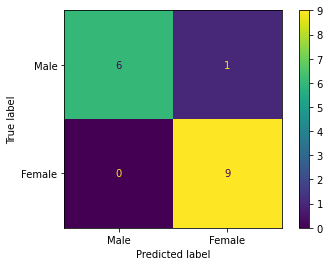

In [184]:
confusion_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

# Multilayer Perceptron Classifier 

In [276]:
#67-33% split
MLP = MLPClassifier()

MLP.fit(X_train, Y_train)

y_pred = MLP.predict(X_test)

acc_MLP = round(accuracy_score(Y_test, y_pred) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLP , "%")

con_matrix = metrics.confusion_matrix(Y_test, y_pred)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(Y_test, y_pred)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  92.59 %
Confusion matrix:
[[10  1]
 [ 1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


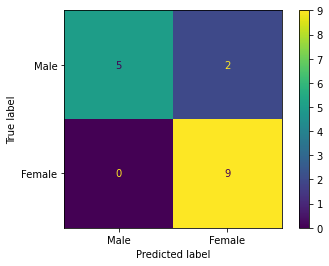

In [53]:
confusion_matrix = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [218]:
#80-20%
MLP = MLPClassifier()

MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_test)

acc_MLP = round(accuracy_score(y_test, y_pred) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLP , "%")

con_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  87.5 %
Confusion matrix:
[[5 2]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.82      1.00      0.90         9

    accuracy                           0.88        16
   macro avg       0.91      0.86      0.87        16
weighted avg       0.90      0.88      0.87        16



D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


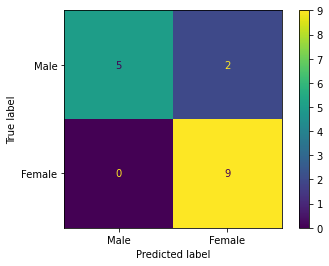

In [188]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

# Monte Carlo Cross Validation

In [330]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

model = DecisionTreeClassifier()

shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=5)

scores=cross_val_score(model,dx,dy,scoring='f1',cv=shuffle_split)

print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score for monte carlo :{}".format(scores.mean()))

cross Validation scores:n [0.95238095 1.         0.92857143 0.96969697 0.96296296]
Average Cross Validation score :0.9627224627224628


# Leave p out Cross Validation

In [ ]:
from sklearn.model_selection import LeavePOut,cross_val_score

model = DecisionTreeClassifier()

lpo = LeavePOut(p=2)
lpo.get_n_splits(dx)

scores=cross_val_score(model,dx,dy,cv=lpo)

print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score for leave p out  :{}".format(scores.mean()))

# Adding New instances and Applying Gaussain Bayes

In [121]:
gender_prediction_df.loc[len(gender_prediction_df.index)] = [74,180,'yes','short',43,'no','black','male']
gender_prediction_df.loc[len(gender_prediction_df.index)] = [78,174,'no','short',42,'no','blue','male']
gender_prediction_df.loc[len(gender_prediction_df.index)] = [67,150,'no','medium',38,'no','black','female']
gender_prediction_df.loc[len(gender_prediction_df.index)] = [75,188,'yes','short',43,'no','gray','male']
gender_prediction_df.loc[len(gender_prediction_df.index)] = [64,145,'no','long',35,'yes','brown','female']


In [124]:
gender_prediction_df.tail(5)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
80,74,180,yes,short,43,no,black,male
81,78,174,no,short,42,no,blue,male
82,67,150,no,medium,38,no,black,female
83,75,188,yes,short,43,no,gray,male
84,64,145,no,long,35,yes,brown,female


In [127]:
label = preprocessing.LabelEncoder()
gender_prediction_df['hair_length'] = label.fit_transform(gender_prediction_df['hair_length'])
gender_prediction_df['beard'] = label.fit_transform(gender_prediction_df['beard'])
gender_prediction_df['eye_color'] = label.fit_transform(gender_prediction_df['eye_color'])
gender_prediction_df['scarf'] = label.fit_transform(gender_prediction_df['scarf'])
gender_prediction_df['gender'] = label.fit_transform(gender_prediction_df['gender'])

In [149]:
dx = genders_df.drop(['gender'], axis = 1)
dy = genders_df['gender']
X_train, X_test, Y_train, Y_test = train_test_split(dx, dy, stratify=dy, test_size=0.33, random_state = 42)

In [150]:
model = GaussianNB()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

In [151]:
model_acc = accuracy_score(Y_test, pred)*100
print(model_acc)

96.29629629629629


In [152]:
model_cl_rep = metrics.classification_report(Y_test, pred)
print(model_cl_rep)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.94      1.00      0.97        16

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



In [153]:
model_recall = recall_score(Y_test, pred)*100
print(model_recall)

100.0


In [154]:
model_precision = precision_score(Y_test, pred)*100
print(model_precision)

94.11764705882352


In [155]:
model_cm = metrics.confusion_matrix(Y_test, pred)
print(model_cm)

[[10  1]
 [ 0 16]]


In [334]:
columns=X_train.columns
dt=RandomForestClassifier(n_estimators=7)
dt.fit(X_train,Y_train)
feature_importance = pd.DataFrame(data={
'Feature': columns,
'Importance': dt.feature_importances_
})

feature_itportance = feature_importance.sort_values(by='Importance',ascending=False)


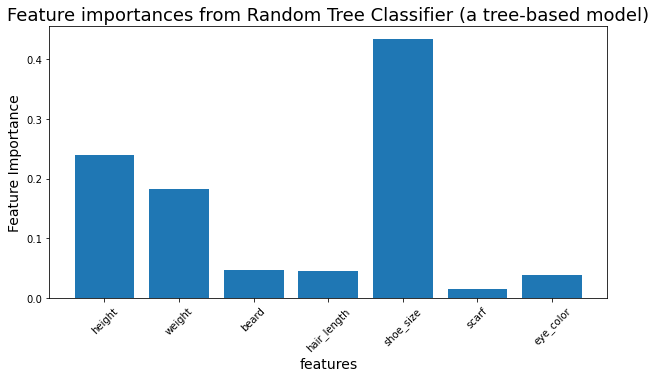

In [342]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from Random Tree Classifier (a tree-based model)', size=18)
plt.ylabel("Feature Importance", size=14)

plt.xlabel("features", size=14)

plt.xticks(rotation=45)

plt.show()

In [336]:
x = gender_prediction_df.drop(['height','shoe_size','gender'], axis = 1)
y = gender_prediction_df['gender']

In [337]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = 42)

In [338]:
#80-20% SVC
SVC_model = svm.SVC(kernel='linear')

SVC_model.fit(x_train, y_train)

y_predict= SVC_model.predict(x_test)

accuracy_LinearSVC = round(accuracy_score(y_test, y_predict) * 100, 2)
print("The accuracy of LinearSVC Classifier : ",accuracy_LinearSVC , "%")

con_matrix = metrics.confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_predict)
print('Classification Report:')
print(class_report)

The accuracy of LinearSVC Classifier :  87.5 %
Confusion matrix:
[[5 2]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.82      1.00      0.90         9

    accuracy                           0.88        16
   macro avg       0.91      0.86      0.87        16
weighted avg       0.90      0.88      0.87        16



In [339]:
#80-20%
random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

accuracy_rf = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",accuracy_rf , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  87.5 %
Confusion matrix:
[[5 2]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.82      1.00      0.90         9

    accuracy                           0.88        16
   macro avg       0.91      0.86      0.87        16
weighted avg       0.90      0.88      0.87        16



In [341]:
#80-20%
MLP = MLPClassifier()

MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_test)

acc_MLP = round(accuracy_score(y_test, y_pred) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLP , "%")

con_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  93.75 %
Confusion matrix:
[[6 1]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.94        16
weighted avg       0.94      0.94      0.94        16



D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
